OOP shortcuts
* Built-in functions that take care of common tasks in one call (so useful)
* File I/O and context managers
* An alternative to method overloading
* Functions as objects

*len, reverse, enumerate*..., *all, any*..., *eval, exec, compile* (I don't use these...)

*hasattr, getattr, setattr, and delattr*, which allow attributes on an
object to be manipulated by their string names.

*zip*, which takes two or more sequences and returns a new sequence of tuples, where each tuple contains a single value from each sequence.

And many more! See the interpreter help documentation for each of the functions listed in dir(\__builtins__). 


In [18]:
a_list = [1,2,3,4,5]
print('len() builtin: {}'.format(len(a_list)))
print('__len__ attr: {}'.format(a_list.__len__()))
print()

len() builtin: 5
__len__ attr: 5



In [19]:
print('look at reversed')
print('a_list: {}'.format(a_list))
print('reversed(a_list): {}'.format(reversed(a_list)))
print('the reversed list: {}'.format(list(reversed(a_list))))
print()

for item in reversed(a_list):
    print(item)

look at reversed
a_list: [1, 2, 3, 4, 5]
reversed(a_list): <list_reverseiterator object at 0x000002E0542530F0>
the reversed list: [5, 4, 3, 2, 1]

5
4
3
2
1


In [22]:
a_string_list = ['one', 'two', 'three', 'four', 'five']
for i,item in enumerate(a_string_list):
    print('item {}: {}'.format(i, item))

print()
for i,item in zip(a_list, a_string_list):
    print('item {}: {}'.format(i, item))

print('mismatched lengths: takes first n-elements of second item in zip')
for i,item in zip(a_list[1:3], a_string_list):
    print('item {}: {}'.format(i, item))

item 0: one
item 1: two
item 2: three
item 3: four
item 4: five

item 1: one
item 2: two
item 3: three
item 4: four
item 5: five

item 2: one
item 3: two


In [7]:
dir(__builtins__)

['ArithmeticError',
 'AssertionError',
 'AttributeError',
 'BaseException',
 'BlockingIOError',
 'BrokenPipeError',
 'BufferError',
 'BytesWarning',
 'ChildProcessError',
 'ConnectionAbortedError',
 'ConnectionError',
 'ConnectionRefusedError',
 'ConnectionResetError',
 'DeprecationWarning',
 'EOFError',
 'Ellipsis',
 'EnvironmentError',
 'Exception',
 'False',
 'FileExistsError',
 'FileNotFoundError',
 'FloatingPointError',
 'FutureWarning',
 'GeneratorExit',
 'IOError',
 'ImportError',
 'ImportWarning',
 'IndentationError',
 'IndexError',
 'InterruptedError',
 'IsADirectoryError',
 'KeyError',
 'KeyboardInterrupt',
 'LookupError',
 'MemoryError',
 'ModuleNotFoundError',
 'NameError',
 'None',
 'NotADirectoryError',
 'NotImplemented',
 'NotImplementedError',
 'OSError',
 'OverflowError',
 'PendingDeprecationWarning',
 'PermissionError',
 'ProcessLookupError',
 'RecursionError',
 'ReferenceError',
 'ResourceWarning',
 'RuntimeError',
 'RuntimeWarning',
 'StopAsyncIteration',
 'StopIter

In [23]:
dir(sum)

['__call__',
 '__class__',
 '__delattr__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__name__',
 '__ne__',
 '__new__',
 '__qualname__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__self__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__text_signature__']

File I/O and context managers
* writing
* reading
* context managers

In [28]:
contents = "Some file contents\n"
file = open("filename.txt", "w")
file.write(contents)
file.close()

file = open("filename2.txt", "w")
file.writelines([contents]*3)
file.close()

# this overwrites every time... also explicit management of open and close
# binary add wb, rb

dir(file)

['_CHUNK_SIZE',
 '__class__',
 '__del__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__enter__',
 '__eq__',
 '__exit__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__iter__',
 '__le__',
 '__lt__',
 '__ne__',
 '__new__',
 '__next__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '_checkClosed',
 '_checkReadable',
 '_checkSeekable',
 '_checkWritable',
 '_finalizing',
 'buffer',
 'close',
 'closed',
 'detach',
 'encoding',
 'errors',
 'fileno',
 'flush',
 'isatty',
 'line_buffering',
 'mode',
 'name',
 'newlines',
 'read',
 'readable',
 'readline',
 'readlines',
 'seek',
 'seekable',
 'tell',
 'truncate',
 'writable',
 'write',
 'writelines']

context managers
* with open(...) as file... calls __enter__ and __exit__ methods on the file object
* cleans up need for 'startup' and 'cleanup' code


In [ ]:
with open("filename.txt", "w") as file:
    file.write(contents)
    
with open("filename_seq_cm.txt", "w") as file:
    file.writelines([contents]*3)

In [4]:
with open("./a-text-file.txt", "r") as file:
    for i,  line in enumerate(file.readlines()):
        print("line {}: {}".format(i+1, line))

line 1: how many lines does it take to make a text document?

line 2: one line.

line 3: two lines..

line 4: three lines....

line 5: @#$%@$Q@$E

line 6: Three lines!



In [29]:
# custom string joiner
class StringJoiner(list):
    def __enter__(self):
        return self
    
    def __exit__(self, type, value, tb):
        self.result = "".join(self)


In [30]:
import random, string

with StringJoiner() as joiner:
    for i in range(15):
        joiner.append(random.choice(string.ascii_letters))

print(joiner.result)

# but...
same_thing = ''.join([random.choice(string.ascii_letters) for i in range(15)])
print(same_thing)

VjMLIieQzDfnaDl
QkxyOnpvtLqjdFA


An alternative to method overloading
* Python doesn't permit multiple methods with the same name!!
* instead, write the function with expectation of argument type

In [31]:
def func1(arg1):
    print('original func1')
    pass

def func1(arg2):
    print('the function has been replaced')
    pass

func1('some arg')

the function has been replaced


In [ ]:
Python functions accept:
* positional arguments
* keyword arguments (with default values)

In [36]:
def function(pos1, pos2, kwd1='None', kwd2=5):
    print('pos1: {}'.format(pos1))
    print('pos2: {}'.format(pos2))
    print('kwd1: {}'.format(kwd1))
    print('kwd2: {}'.format(kwd2))
    pass

#function(1)
#function(1,2)
#function(1, 2, kwd1='2')
#function(2,['hi'], kwd1={'some':'key-value'}, kwd2=('a', 'tuple'))

# specify all inputs out of order
function(pos2=2, pos1=['hi'], kwd2={'some':'key-value'}, kwd1=('a', 'tuple'))

pos1: ['hi']
pos2: 2
kwd1: ('a', 'tuple')
kwd2: {'some': 'key-value'}


In [46]:
# variable argument lists
def extract_list(*somelist):
    
    print(somelist)
    for item in somelist:
        print(item)

extract_list()
#extract_list(1)
#extract_list(tuple(range(10))) # feel free to fiddle with this one
#extract_list(1,2,3,4)
#extract_list('item1', 'item2', 'item3')

()
((0, 1, 2, 3, 4, 5, 6, 7, 8, 9),)
(0, 1, 2, 3, 4, 5, 6, 7, 8, 9)


In [48]:
class Options:
    default_options = {
        'port': 21,
        'host': 'localhost',
        'username': None,
        'password': None,
        'debug': False
    }
    
    def __init__(self, **kwargs):
        self.options = dict(Options.default_options) # set the default options
        self.options.update(kwargs) # update based on user input, can also add keys for the options
        
    def __getitem__(self, key):
        return self.options[key]
    
    
# sample1 = Options(username='dusty', password='drowssap', some_other_option=True)
# print(sample1.options)

sample2 = Options()
print(sample2.options)
sample2['port']

{'port': 21, 'host': 'localhost', 'username': None, 'password': None, 'debug': False}


21

Ordering of arguments:
* positional
* \*list argument
* keyword arguments
* \** dictionary to hold anything else

In [52]:
import shutil
import os.path
def augmented_move(target_folder, *filenames, verbose=False, **specific):
    '''Move all filenames into the target_folder, allowing specific treatment of certain files.'''
    
#     # print args
    print('target_folder: {}'.format(target_folder))
    print('filenames: {}'.format(filenames))
    print('verbose: {}'.format(verbose))
    print('specific: {}'.format(specific))
    
    def print_verbose(message, filename):
        '''print the  message only if verbose is enabled'''
        
        if verbose:
            print(message.format(filename))
    
    ## augmented_move block
    # to get the example to work...
    filenames = list(filenames)          # comes in as a tuple
    filenames.extend(specific.keys())    # use list.extend
    
    for filename in filenames:
        target_path = os.path.join(target_folder, filename)
        if filename in specific:
            if specific[filename] == 'ignore':
                print_verbose("Ignoring {}", filename)
                
            elif specific[filename] == 'copy':
                print_verbose("Copying {}", filename)
                shutil.copyfile(filename, target_path)

        else:

            try:
                print_verbose("Moving {}...", filename)
                shutil.move(filename, target_path)
            except:
                print('file {} does not exist'.format(filename))
                
augmented_move("target_folder", "one", verbose=True, two="ignore", three="ignore")

target_folder: target_folder
filenames: ('one',)
verbose: True
specific: {'two': 'ignore', 'three': 'ignore'}
Moving one...
file one does not exist
Ignoring two
Ignoring three


Unpacking arguments
* can provide arguments as sequence, list, or dictionary

In [53]:
def show_args(arg1, arg2, arg3="THREE"):
    print(arg1, arg2, arg3)
    
some_args = range(2)
more_args = {
    "arg1": "ONE",
    "arg2": "TWO"
}


show_args(*some_args)
show_args(**more_args)

0 1 THREE
ONE TWO THREE


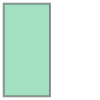

In [56]:
# a more practical example for us...
from shapely.geometry import box
bounds = [0,0,5,10]
box(*bounds)
# help(box)

Treating functions like objects
* if you want, you can set descriptions or any other named attribute on a function
    * why would you want to do this?
* you have access to the \__name__ attribute

Let's go through the timer example because I found it odd...

In [61]:
def function_object():
    '''help doc'''
    pass

function_object.whatever = 'something'
function_object.whatever, function_object.__name__
# help(function_object)

('something', 'function_object')

PyTorch DataLoader example - Sampling an image -- won't work if you don't have the data/libraries... so don't worry about it!! I've kept it for the figures.

In [62]:
from test_unet_helpers import get_points_list, gtDatasetSampler2

gt_image_2 = '../smart_cities/rasters/union_impervious_raster_2_0_0_wgs84.tif'
dg_id = '1030010057062200'
shpfile = '../smart_cities/union/union.shp'

coords = get_points_list(gt_image_2, dg_id, shpfile, num=100)

In [63]:
coords

[(1136, 2676),
 (1721, 568),
 (1074, 1871),
 (1241, 2710),
 (1485, 544),
 (980, 1800),
 (1240, 2196),
 (1329, 2055),
 (1691, 976),
 (1574, 2323),
 (395, 1808),
 (1428, 1774),
 (721, 1966),
 (1423, 1343),
 (1308, 993),
 (648, 1599),
 (2030, 2758),
 (681, 2004),
 (556, 1722),
 (679, 2288),
 (1700, 144),
 (207, 1432),
 (570, 1878),
 (1345, 2660),
 (1478, 2437),
 (797, 1747),
 (1263, 1899),
 (2139, 2959),
 (1089, 2447),
 (1492, 474),
 (1736, 2497),
 (226, 1425),
 (1043, 1475),
 (1157, 1911),
 (1204, 2074),
 (1079, 1657),
 (1808, 2619),
 (1398, 1429),
 (1134, 1976),
 (2211, 2948),
 (1659, 690),
 (1702, 2951),
 (1342, 2668),
 (1624, 2499),
 (1531, 1156),
 (302, 1727),
 (785, 2332),
 (65, 1607),
 (824, 1389),
 (781, 2141),
 (1414, 672),
 (596, 1821),
 (1849, 2959),
 (1810, 2474),
 (1773, 2626),
 (778, 2334),
 (1273, 914),
 (175, 1621),
 (798, 2013),
 (1917, 3183),
 (2102, 2628),
 (1624, 484),
 (1731, 2956),
 (1187, 2185),
 (405, 1415),
 (1001, 2181),
 (1582, 2840),
 (2090, 2609),
 (194, 1468)

In [74]:
from torch.utils.data import Dataset
import rasterio 
import numpy as np
import torch

class gtDatasetSampler2(Dataset):
    """DG Dataset"""
    def __init__(self, gtfile, coord_pair, window_size=64, transform=None):
        """ 
        Args:
            image_dir(string): the folder containing the DG images
            transform (callable, optional): Optional transform to  be applies
        """
        self.image_file = gtfile
        self.transform = transform
        self.coords = coord_pair
        self.window_size = window_size
        
    
    def __getitem__(self, idx):
        
        with rasterio.open(self.image_file, 'r') as src:
            temp = src.read()
        
        # get the window
        r,c = self.coords[idx]
        r_start = int(r - self.window_size/2)
        r_end = int(r_start + self.window_size)
        c_start = int(c - self.window_size/2)
        c_end = int(c_start + self.window_size)
        
        # extract the window
        img_arr = temp[0,r_start:r_end, c_start:c_end]
        img_arr = np.expand_dims(img_arr, axis=0)

        # set no data to 0
        img_arr[img_arr == 3] = 0
        
        # convert to tensor
        img_arr = torch.from_numpy(img_arr).float()
        
        return img_arr
    
    def __len__(self):
        return len(self.coords)


In [70]:
from torchvision.transforms import ToTensor, Normalize, Compose
from torch.utils.data import DataLoader

gt_transform = Compose([
    ToTensor()
    ])

gt_dataset_train = gtDatasetSampler2(gt_image_2, coords, transform=gt_transform) 
# gt_dl_train = DataLoader(gt_dataset_train, batch_size=5, shuffle=False)

len(gt_dataset_train), len(coords)

(100, 100)

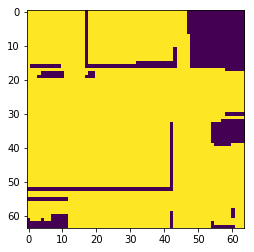

In [77]:
from matplotlib import pyplot as plt
plt.imshow(gt_dataset_train[0][0])
plt.show()

In [76]:
gt_dataset_train[1].shape

torch.Size([1, 64, 64])